# Step 3 — From Brownian Motion to GBM (Itô memo, log-prices)

**Goal:** connect Brownian motion to a *price process* via the Geometric Brownian Motion (GBM). You will:
- use the Itô memo to get an SDE for log-prices,
- write and use the **exact** GBM step,
- compare **Euler** vs **Exact** simulation,
- verify log-return moments and terminal distribution.


## 1) Itô memo → Log-price dynamics

GBM (price model):
$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t.
$$

Itô memo (rules of thumb): $(dW)^2=dt$, $dt\,dW=0$, $(dt)^2=0$.
Apply Itô to $\ln S_t$:
$$
d\ln S_t = \frac{1}{S_t}\,dS_t - \tfrac12\,\frac{1}{S_t^2}(dS_t)^2
= \left(\mu - \tfrac12\sigma^2\right)dt + \sigma\,dW_t.
$$

Integrate from $0$ to $t$:
$$
\ln S_t = \ln S_0 + \left(\mu - \tfrac12\sigma^2\right)t + \sigma W_t.
$$

Therefore,
$$
S_t = S_0\exp\!\Big((\mu-\tfrac12\sigma^2)t + \sigma W_t\Big),\quad
\ln S_t\sim\mathcal N\!\Big(\ln S_0+(\mu-\tfrac12\sigma^2)t,\ \sigma^2 t\Big).
$$

**Consequences:** $S_t>0$ always; $\mathbb E[S_t]=S_0 e^{\mu t}$; log-returns over $\Delta t$ are Normal with mean $(\mu-\tfrac12\sigma^2)\Delta t$ and variance $\sigma^2\Delta t$.


**What we start from.** Prices are modeled by GBM:

$$
dS_t=\mu S_t\,dt+\sigma S_t\,dW_t,
$$

which has **multiplicative noise** (the random shock scales with $S_t$). Working directly with $S_t$ is messy: $S_t$ is not Normal, and the “usual” chain rule fails with noisy terms.

**What Itô gives us.** Itô’s lemma is the **correct chain rule for stochastic processes**. For any smooth function $f(t,S_t)$ it tells you what $df$ is, and it adds the crucial extra term coming from $(dW)^2=dt$. When we choose $f(S)=\ln S$, Itô turns multiplicative noise into **additive noise**:

$$
d\ln S_t=\Big(\mu-\tfrac12\sigma^2\Big)dt+\sigma\,dW_t.
$$

**Why that matters.**

* We immediately get **tractable moments**:

  * $\mathbb{E}[\ln S_t]=\ln S_0+(\mu-\tfrac12\sigma^2)t$
  * $\operatorname{Var}(\ln S_t)=\sigma^2 t$
* Therefore $S_t$ is **lognormal**, stays **positive**, and $\mathbb{E}[S_t]=S_0e^{\mu t}$.
* It explains the famous **$-\tfrac12\sigma^2$ correction**: without the $(dW)^2=dt$ rule, you’d miss it.
* It’s the doorway to everything that follows in quant finance: transforming payoffs $f(S_t)$, deriving Black–Scholes, etc.

**Mini-algebra (optional, compact).**  
Start with $f(S)=\ln S$. Itô says

$$
df=f_S\,dS+\tfrac12 f_{SS}\,(dS)^2.
$$

Here $f_S=\tfrac1S$, $f_{SS}=-\tfrac1{S^2}$, and $(dS)^2=(\sigma S\,dW)^2=\sigma^2 S^2\,dt$. Substitute:

$$
d\ln S_t=\tfrac{1}{S_t}(\mu S_t\,dt+\sigma S_t\,dW_t)-\tfrac12\tfrac{1}{S_t^2}\,\sigma^2 S_t^2\,dt
=\Big(\mu-\tfrac12\sigma^2\Big)dt+\sigma\,dW_t.
$$

**Bottom line.** We use the Itô memo in Step 3 to **move to log-prices**, where the model becomes a simple “drift + Gaussian noise” with known mean/variance. That unlocks the **closed form** for GBM and clean diagnostics for simulations.

## 2) Discrete-time steps (for simulation)

**Exact GBM step (closed-form):** for $\Delta t$ and $Z\sim\mathcal N(0,1)$,
$$
S_{k+1} = S_k\,\exp\!\Big((\mu-\tfrac12\sigma^2)\Delta t + \sigma\sqrt{\Delta t}\,Z\Big).
$$

**Euler–Maruyama (approximation):**
$$
S_{k+1} = S_k + \mu S_k\,\Delta t + \sigma S_k\sqrt{\Delta t}\,Z.
$$

- **Exact** is preferred for GBM (no discretization bias, preserves $S>0$).
- **Euler** is generic but may produce negative values for large negative shocks.


**Why discretize at all?** Computers evolve SDEs in **finite time steps**. We need an update rule from time $t_k$ to $t_{k+1}=t_k+\Delta t$.

**Exact GBM step (best for GBM).** Because GBM has a closed form,

$$
S_{k+1}=S_k\exp\!\Big((\mu-\tfrac12\sigma^2)\Delta t+\sigma\sqrt{\Delta t}\,Z_k\Big),\quad Z_k\sim\mathcal N(0,1).
$$

**Properties you get:**

* **Positivity** guaranteed ($S_{k+1}>0$).
* **No discretization bias** (terminal distribution and log-return moments are exact for any $\Delta t$).
* **Step-size invariance at horizon $T$**: using 252 vs 504 steps yields (up to Monte Carlo noise) the same law for $S_T$.

**Euler–Maruyama (generic approximation).**

$$
S_{k+1}=S_k+\mu S_k\,\Delta t+\sigma S_k\sqrt{\Delta t}\,Z_k.
$$

**When/why to use it:**

* Works for **many SDEs** with no closed form.
* Cheap and simple, good when $\Delta t$ is **very small**.

**Caveats with Euler (for GBM specifically):**

* Can produce **non-positive** prices after a large negative shock.
* Has **discretization error**: moments depend slightly on $\Delta t$ (bias of order $\mathcal O(\Delta t)$).
* Use it mainly to learn the mechanics or when you extend beyond GBM (e.g., local/stochastic volatility). For plain GBM, **prefer the exact step**.

**Practical tips.**

* Keep units consistent: if $\mu,\sigma$ are annualized, use $\Delta t=1/252$ for daily steps.
* Diagnostics to sanity-check a simulation:

  1. mean(log-return) $\approx(\mu-\tfrac12\sigma^2)\Delta t$
  2. var(log-return) $\approx\sigma^2\Delta t$
  3. $\ln S_T$ approximately Normal with variance $\sigma^2 T$
  4. For exact GBM, results at horizon $T$ shouldn’t change when you refine $\Delta t$.

**Rule of thumb.** For GBM, use the **exact** formula. Switch to **Euler** (or better, **Milstein**) only when the model breaks GBM’s closed form.

In [1]:
# Utilities: GBM simulators (exact and Euler)
import numpy as np
import matplotlib.pyplot as plt

def gbm_exact(s0=100.0, mu=0.08, sigma=0.2, T=1.0, steps=252, paths=10, seed=None):
    rng = np.random.default_rng(seed)
    dt = T / steps
    Z = rng.standard_normal(size=(steps, paths))
    drift = (mu - 0.5 * sigma**2) * dt
    vol = sigma * np.sqrt(dt)
    increments = np.exp(drift + vol * Z)
    S = np.empty((steps + 1, paths))
    S[0] = s0
    S[1:] = s0 * np.cumprod(increments, axis=0)
    return S

def gbm_euler(s0=100.0, mu=0.08, sigma=0.2, T=1.0, steps=252, paths=10, seed=None):
    rng = np.random.default_rng(seed)
    dt = T / steps
    Z = rng.standard_normal(size=(steps, paths))
    S = np.empty((steps + 1, paths))
    S[0] = s0
    for k in range(steps):
        S[k+1] = S[k] + mu*S[k]*dt + sigma*S[k]*np.sqrt(dt)*Z[k]
    return S


## 3) Experiment 1 — Paths: Exact vs Euler

**Question:** What do the two schemes look like? Does Euler ever go negative?

- Plot a few paths with the **exact step**.
- Plot a few paths with **Euler**.
- Count how many Euler paths dip at or below 0 (should be rare at daily steps but possible with large $\sigma$ or big $\Delta t$).


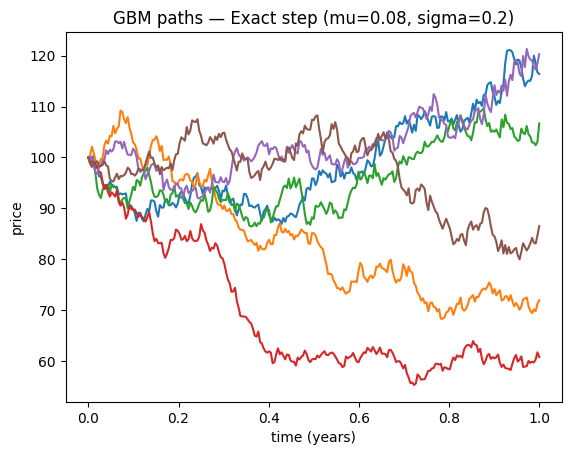

In [2]:
# Exact paths
S_exact = gbm_exact(s0=100, mu=0.08, sigma=0.2, T=1.0, steps=252, paths=6, seed=7)
t = np.linspace(0, 1.0, S_exact.shape[0])
plt.figure()
plt.plot(t, S_exact)
plt.xlabel("time (years)")
plt.ylabel("price")
plt.title("GBM paths — Exact step (mu=0.08, sigma=0.2)")
plt.show()


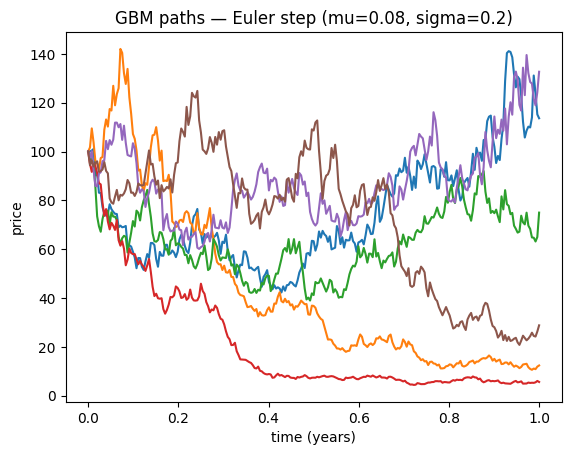

In [3]:
# Euler paths
S_euler = gbm_euler(s0=100, mu=0.08, sigma=0.9, T=1.0, steps=252, paths=6, seed=7)
t = np.linspace(0, 1.0, S_euler.shape[0])
plt.figure()
plt.plot(t, S_euler)
plt.xlabel("time (years)")
plt.ylabel("price")
plt.title("GBM paths — Euler step (mu=0.08, sigma=0.2)")
plt.show()


In [4]:
# Check for non-positivity under Euler
S_euler_many = gbm_euler(s0=100, mu=0.08, sigma=0.6, T=1.0, steps=52, paths=5000, seed=123)
min_vals = S_euler_many.min(axis=0)
violations = np.sum(min_vals <= 0)
print(f"Euler non-positive paths (coarse steps, high sigma): {violations} / {S_euler_many.shape[1]}")


Euler non-positive paths (coarse steps, high sigma): 0 / 5000


# Why you didn’t see a difference

With typical parameters (e.g., $T=1$ year, **steps = 252**, $\mu\approx 0.08$, $\sigma\approx 0.2$):

* The Euler update is $S_{k+1}=S_k\big(1+\mu\,\Delta t+\sigma\sqrt{\Delta t}\,Z_k\big)$.
* A negative step requires $1+\mu\,\Delta t+\sigma\sqrt{\Delta t}\,Z_k<0$ ⇒

  $$
  Z_k < -\frac{1+\mu\,\Delta t}{\sigma\sqrt{\Delta t}}.
  $$

  With $\Delta t=1/252$, $\sigma=0.2$, $\mu=0.08$, the right-hand side is about **−79** 🤯, so the probability is essentially **0**.  
  Result: Euler ≈ Exact visually.

# How to *force* differences

Change any (or several) of these:

1. **Coarsen the step size** (fewer steps): monthly ($12$) or quarterly ($4$) instead of daily (252).
2. **Increase volatility**: try $\sigma\in[0.8,1.2]$ to make big shocks more common.
3. **Lengthen the horizon** $T$ (so discretization error accumulates).
4. **Use many paths** (so small biases show up in averages).

Concrete combos that will show differences quickly:

* **Quarterly steps** (steps = 4) with **σ = 1.0** (or even 0.8).
* **Monthly steps** (steps = 12) with **σ = 1.2**.
* Keep $S_0=100$, $\mu=0.08$, $T=1$.

# What you should see then

* **Euler non-positive prices**: a small but visible fraction of paths dip at or below 0 (exact GBM never does).
* **Moment bias** with Euler: mean/variance of $\ln S_T$ (or of $S_T$) drift away from theory when steps are coarse; exact GBM stays stable.

# When can Euler go negative?
Euler updates $S_{k+1}=S_k(1+\mu\Delta t+\sigma\sqrt{\Delta t}\,Z)$.  
A single step is negative iff

$$
Z< -\frac{1+\mu\Delta t}{\sigma\sqrt{\Delta t}}.
$$

With daily steps and moderate $\sigma$, this threshold is extremely far in the tail → essentially zero probability.  
With **coarser $\Delta t$** and **larger $\sigma$**, the threshold moves into a range that happens in practice, so negative Euler steps appear.


In [5]:
### B) Code: make non-positive Euler paths show up

# Try coarse steps + high sigma to see Euler negatives
import numpy as np

for steps, sigma in [(12,1.2), (12,1.0), (4,1.0), (4,0.8)]:
    S = gbm_euler(sigma=sigma, steps=steps, paths=20000, seed=42)
    frac_nonpos = (S[1:] <= 0).any(axis=0).mean()
    print(f"Euler non-positive paths: steps={steps:>3}, sigma={sigma:>3.1f} -> {100*frac_nonpos:.2f}%")


Euler non-positive paths: steps= 12, sigma=1.2 -> 2.21%
Euler non-positive paths: steps= 12, sigma=1.0 -> 0.29%
Euler non-positive paths: steps=  4, sigma=1.0 -> 8.11%
Euler non-positive paths: steps=  4, sigma=0.8 -> 2.25%


In [6]:
### C) Code: show bias in moments vs exact when steps are coarse

import numpy as np

def stats_ln_ST(S):
    ln_ST = np.log(S[-1])
    return ln_ST.mean(), ln_ST.var(ddof=1)

mu, sigma, T, paths = 0.08, 0.8, 1.0, 40000
theory_mean = np.log(100) + (mu - 0.5*sigma**2)*T
theory_var  = sigma**2 * T

print(f"Theory ln S_T: mean={theory_mean:.4f}, var={theory_var:.4f}")

for steps in [4, 12, 52, 252]:
    S_ex = gbm_exact(100, mu, sigma, T, steps, paths, seed=1)
    S_eu = gbm_euler(100, mu, sigma, T, steps, paths, seed=1)
    m_ex, v_ex = stats_ln_ST(S_ex)
    m_eu, v_eu = stats_ln_ST(S_eu)
    print(f"steps={steps:>3} | Exact: mean={m_ex:.4f}, var={v_ex:.4f} | Euler: mean={m_eu:.4f}, var={v_eu:.4f}")


Theory ln S_T: mean=4.3652, var=0.6400
steps=  4 | Exact: mean=4.3605, var=0.6402 | Euler: mean=nan, var=nan
steps= 12 | Exact: mean=4.3586, var=0.6424 | Euler: mean=nan, var=nan
steps= 52 | Exact: mean=4.3692, var=0.6376 | Euler: mean=4.3646, var=0.6569


C:\Users\Mbaka\AppData\Local\Temp\ipykernel_31712\2367375152.py:6: RuntimeWarning: invalid value encountered in log
  ln_ST = np.log(S[-1])


steps=252 | Exact: mean=4.3739, var=0.6348 | Euler: mean=4.3731, var=0.6385


## 4) Experiment 2 — Log-return moments (theory vs data)

For the exact step, log-returns at one grid step satisfy:
$$
\Delta\ln S \sim \mathcal N\Big((\mu-\tfrac12\sigma^2)\Delta t,\ \sigma^2\Delta t\Big).
$$
We estimate their mean and variance and compare to the theoretical values.
### Why this experiment?

We want to verify that, under GBM,

$$
dS_t=\mu S_t\,dt+\sigma S_t\,dW_t,
$$

the **log-returns over one grid step** behave like “drift + Gaussian noise” with the right mean and variance. This is the key local diagnostic that your simulation is scaled correctly.

---

### Theoretical result (one grid step)

Using the exact GBM step

$$
S_{k+1}=S_k\exp\!\Big((\mu-\tfrac12\sigma^2)\,\Delta t+\sigma\sqrt{\Delta t}\,Z_k\Big),\quad Z_k\sim\mathcal N(0,1),
$$

the **log-return** over that step is

$$
r_k \;:=\; \Delta\ln S_k \;=\; \ln S_{k+1}-\ln S_k
\;=\; (\mu-\tfrac12\sigma^2)\,\Delta t \;+\; \sigma\sqrt{\Delta t}\,Z_k.
$$

Therefore

* mean (theory): $m_{\text{th}}=(\mu-\tfrac12\sigma^2)\,\Delta t,$  
* variance (theory): $v_{\text{th}}=\sigma^2\,\Delta t,$  
* standard deviation: $\sqrt{v_{\text{th}}}=\sigma\sqrt{\Delta t}.$  

*(If you simulate with the exact step, these hold exactly in distribution. With Euler, they hold approximately, with an error that shrinks as $\Delta t\to 0$.)*

---

### How to get the empirical values from your simulation

1. **Collect all one-step log-returns.**  
   For each path and each time step on your grid, compute

   $$
   r_k=\ln S_{k+1}-\ln S_k.
   $$

   Pool them across all paths and steps. If you have $P$ paths and $N$ steps per path, you get $M=P\times N$ increments $\{r_1,\dots,r_M\}$.

2. **Empirical mean (drift of log-returns).**

   $$
   \bar r \;=\; \frac{1}{M}\sum_{i=1}^M r_i.
   $$

3. **Empirical variance (noise strength).**

   $$
   s^2 \;=\; \frac{1}{M-1}\sum_{i=1}^M (r_i-\bar r)^2.
   $$

4. **Compare to theory.**  
   Check that $\bar r \approx m_{\text{th}}$ and $s^2 \approx v_{\text{th}}$.  
   With more samples $M$, the match tightens.

5. **(Optional) Standard errors for the comparison.**  
   For Normal data,

   $$
   \text{SE}(\bar r)\approx \frac{s}{\sqrt{M}},\qquad
   \text{SE}(s^2)\approx s^2\,\sqrt{\frac{2}{M-1}}.
   $$

   These help judge whether any gap is just sampling noise.

---

### Why pooling across all steps is valid

Under GBM with the exact step, the one-step log-returns are i.i.d. with the same mean and variance at every grid step (stationary independent increments).  
That’s why you can safely pool them across time **and** paths to get a large sample.

---

### What you should see

* A histogram of the $r_k$ that is **bell-shaped**, centered near $m_{\text{th}}$.  
* The empirical variance near $v_{\text{th}}$.  
* If you increase the number of paths, the empirical mean/variance get closer to the theoretical values (smaller SE).

---

### Common pitfalls

* **Wrong units:** if $\mu,\sigma$ are annualized, use $\Delta t=1/252$ for daily data, etc.  
* **Mixing levels and returns:** make sure you compute $r_k=\ln S_{k+1}-\ln S_k$, not $S_{k+1}-S_k$.  
* **Using Euler with coarse steps:** small biases can appear; refine $\Delta t$ or switch to the exact GBM step for this test.


In [7]:
S = gbm_exact(s0=100, mu=0.08, sigma=0.2, T=1.0, steps=252, paths=10000, seed=42)
dt = 1.0/252
logrets = np.diff(np.log(S), axis=0)
m_emp = logrets.mean()
v_emp = logrets.var(ddof=1)
m_th = (0.08 - 0.5*0.2**2) * dt
v_th = (0.2**2) * dt
print(f"Mean(log-return)  Empirical: {m_emp:.6e}  |  Theory: {m_th:.6e}")
print(f"Var(log-return)   Empirical: {v_emp:.6e}  |  Theory: {v_th:.6e}")


Mean(log-return)  Empirical: 2.450687e-04  |  Theory: 2.380952e-04
Var(log-return)   Empirical: 1.586998e-04  |  Theory: 1.587302e-04


## 5) Experiment 3 — Terminal distribution (lognormal check)

From the closed form, $\ln S_T$ is Normal; hence $S_T$ is **lognormal**. We check by plotting a histogram of $\ln S_T$ and overlaying a Normal pdf with the sample mean/variance.


ln S_T  mean≈4.6234, sd≈0.2497


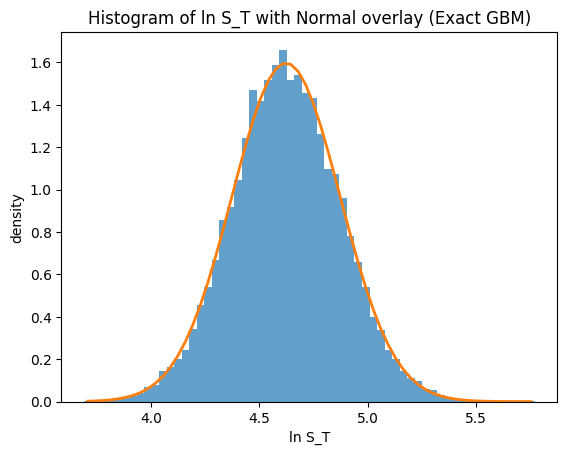

In [8]:
S = gbm_exact(s0=100, mu=0.05, sigma=0.25, T=1.0, steps=252, paths=20000, seed=7)
ln_ST = np.log(S[-1])
m = ln_ST.mean(); v = ln_ST.var(ddof=1); sd = np.sqrt(v)
print(f"ln S_T  mean≈{m:.4f}, sd≈{sd:.4f}")
plt.figure()
count, bins, _ = plt.hist(ln_ST, bins=60, density=True, alpha=0.7)
centers = 0.5*(bins[:-1]+bins[1:])
pdf = (1.0/(sd*np.sqrt(2*np.pi))) * np.exp(-0.5*((centers-m)/sd)**2)
plt.plot(centers, pdf, linewidth=2)
plt.xlabel("ln S_T")
plt.ylabel("density")
plt.title("Histogram of ln S_T with Normal overlay (Exact GBM)")
plt.show()


## 6) Experiment 4 — Time-step invariance (Exact vs different $\Delta t$)

The exact scheme's one-step law depends only on $\Delta t$, so for the **same $T$**, using finer grids should not change the *distribution at horizon T*. We compare moments across step sizes.


In [9]:
def terminal_ln_stats(steps):
    S = gbm_exact(s0=100, mu=0.08, sigma=0.2, T=1.0, steps=steps, paths=20000, seed=123)
    ln_ST = np.log(S[-1])
    return ln_ST.mean(), ln_ST.var(ddof=1)

for steps in [126, 252, 504, 1008]:
    m, v = terminal_ln_stats(steps)
    print(f"steps={steps:4d} -> mean(ln S_T)≈{m:.6f}, var(ln S_T)≈{v:.6f}")


steps= 126 -> mean(ln S_T)≈4.668092, var(ln S_T)≈0.040478
steps= 252 -> mean(ln S_T)≈4.666724, var(ln S_T)≈0.039951
steps= 504 -> mean(ln S_T)≈4.666137, var(ln S_T)≈0.040083
steps=1008 -> mean(ln S_T)≈4.666495, var(ln S_T)≈0.039862


## 7) Summary: Euler vs Exact for GBM

- **Exact**: preserves positivity, matches theoretical moments exactly at any grid; best choice for GBM.
- **Euler**: simple and general, but can go negative and has discretization error unless $\Delta t$ is very small.


## Exercises (with quick answers)

1. **Positivity check:** Increase $\sigma$ and/or decrease the number of steps in the Euler simulation. Do you observe more non-positive paths?  
   **Answer:** Yes. Coarser $\Delta t$ and larger $\sigma$ increase the chance a single step crosses zero.
2. **Log-return moments:** For the exact scheme, verify that $\bar r/\Delta t$ estimates $(\mu-\tfrac12\sigma^2)$ and $\operatorname{Var}(r)/\Delta t$ estimates $\sigma^2$.  
   **Answer:** They converge to the theoretical values as you increase paths.
3. **Change $T$:** Double the horizon $T$ (keep steps/T fixed). What happens to $\mathbb E[\ln S_T]$ and $\operatorname{Var}(\ln S_T)$?  
   **Answer:** They scale linearly with $T$: mean adds $(\mu-\tfrac12\sigma^2)T$, variance adds $\sigma^2 T$.
4. **Standardize increments:** Form $z = (\Delta\ln S - m_{th})/\sqrt{v_{th}}$. What does its histogram look like?  
   **Answer:** Standard Normal bell curve.
